In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv('./data/books_final.csv', index_col=0)

In [5]:
books

,作品ID,作品名,人物ID,XHTML/HTMLファイルURL,inception,char_count,text
0,59898,ウェストミンスター寺院,1257,https://www.aozora.gr.jp/cards/001257/files/59...,NaN,10562.0,深いおどろきにうたれて、名高いウェストミンスターに真鍮や石の記念碑となってすべての王侯貴族が...
1,56078,駅伝馬車,1257,https://www.aozora.gr.jp/cards/001257/files/56...,NaN,6041.0,いざ、これより樂しまむ、仕置を受くる憂なく、遊びたのしむ時ぞ來ぬ、時ぞ來ぬれば、いちはやく、...
2,60224,駅馬車,1257,https://www.aozora.gr.jp/cards/001257/files/60...,NaN,6216.0,すべてよし。何して遊ぼと叱られない。時はきた。さっさと本など投げだそう。――休日に歌った昔の...
3,60225,寡婦とその子,1257,https://www.aozora.gr.jp/cards/001257/files/60...,NaN,7042.0,年老いた人をいたわりなさい。その銀髪は、名誉と尊敬をつねに集めてきたのです。――マーロウ作「...
4,60231,クリスマス,1257,https://www.aozora.gr.jp/cards/001257/files/60...,NaN,4953.0,だが、あのなつかしい、思い出ふかいクリスマスのお爺さんはもう逝ってしまったのだろうか。あとに...
...,...,...,...,...,...,...,...
17485,49911,面とペルソナ,1395,https://www.aozora.gr.jp/cards/001395/files/49...,1935,4761.0,問題にしない時にはわかり切ったことと思われているものが、さて問題にしてみると実にわからなくな...
17486,55622,夢,1395,https://www.aozora.gr.jp/cards/001395/files/55...,1952,12400.0,夢の話をするのはあまり気のきいたことではない。確か痴人夢を説くという言葉があったはずだ。そう...
17487,49876,『劉生画集及芸術観』について,1395,https://www.aozora.gr.jp/cards/001395/files/49...,1921,4655.0,自分は現代の画家中に岸田君ほど明らかな「成長」を示している人を知らない。誇張でなく岸田君は一...
17488,49913,霊的本能主義,1395,https://www.aozora.gr.jp/cards/001395/files/49...,1907,12075.0,一荒漠たる秋の野に立つ。星は月の御座を囲み月は清らかに地の花を輝らす。花は紅と咲き黄と匂い紫...


In [3]:
info = pd.read_csv('./data/list_person_all_extended_utf8.csv', usecols=['作品ID', '初出', '分類番号', '文字遣い種別'])

In [11]:
new = info[~(info['初出'].isnull())].drop_duplicates(subset=['作品ID'])['作品ID'].values

In [10]:
have = books[~(books['inception'].isnull())]['作品ID'].values

In [14]:
add = set(new) - set(have)
add = np.array(list(add))

In [20]:
len(books[books['作品ID'].isin(add)]), books[books['作品ID'].isin(add)].isnull().sum()

(927,
 作品ID                   0
 作品名                    0
 人物ID                   0
 XHTML/HTMLファイルURL      0
 inception            927
 char_count             0
 text                   0
 dtype: int64)

In [29]:
new_years = info[info['作品ID'].isin(add)].drop_duplicates(subset=['作品ID'])

In [36]:
new_years

,作品ID,初出,分類番号,文字遣い種別
38,56572,「青空文庫」1997（平成9）年7月7日,NDC 010,新字新仮名
58,16,「中央公論」1920（大正9）年4月,NDC 913,新字旧仮名
60,15,「赤い鳥」1921（大正10）年1、2月,NDC K913,新字旧仮名
61,43014,「赤い鳥」1921（大正10）年1月、2月,NDC K913,新字新仮名
65,17,「中央公論」1919（大正8）年1月,NDC 914,新字旧仮名
...,...,...,...,...
18995,2173,小野クララの筆名で「文芸春秋」昭和4年10月号に掲載。,NDC 913,新字新仮名
18997,2176,「文芸都市」昭和4年6月号,NDC 913,新字新仮名
19300,2571,「新青年」1929（昭和4）年8月,NDC 913,新字新仮名
19303,883,「新青年」1927（昭和2）年3月,NDC 913,新字新仮名


In [ ]:
import re

def get_year(row):
    showa_start = 1926
    year_pattern = re.compile(r'(1[0-9]{3}|2[0-9]{3})')
    
    match = year_pattern.search(row)
    if match:
        # print(f"Found year: {match.group(1)} in text: \"{row}\"")
        return match.group(1)
    else:
        pattern = re.compile(r'昭和(元|\d{1,2})年')
        match = pattern.search(row)
        if match:
            year_str = match.group(1)
            year = 1 if year_str == "元" else int(year_str)
            gregorian_year = showa_start + year - 1
            return gregorian_year
        else:
            print(f"No 昭和 year found in text: \"{row}\"")
            return None

In [55]:
new_years['初出'].apply(get_year)

No 昭和 year found in text: "不詳"
No 昭和 year found in text: "「太陽　創刊号」"
No 昭和 year found in text: "「大日本青年」（「浪立つ極東航路」のタイトルで。）"
No 昭和 year found in text: "未詳"
No 昭和 year found in text: "不詳"
No 昭和 year found in text: "THE QUEEN OF HEARTS"
No 昭和 year found in text: "「京都經濟會講演集第三號」京都經濟會"
No 昭和 year found in text: "初出不詳"
No 昭和 year found in text: "「シナリオ文学全集　内容見本」河出書房"
No 昭和 year found in text: "「第二回岡田糓滞仏油絵展目録」"
No 昭和 year found in text: "「デカルト選集　内容見本」創元社"
No 昭和 year found in text: "「現代短歌大系　内容見本」河出書房"
No 昭和 year found in text: "「アナトオル・フランス短編小説全集　内容見本」白水社"
No 昭和 year found in text: "「仏蘭西文学賞叢書　内容見本」実業之日本社"
No 昭和 year found in text: "「横光利一全集　内容見本」改造社"
No 昭和 year found in text: "「吉江喬松全集　内容見本」白水社"
No 昭和 year found in text: "「神港夕刊新聞」「九州タイムズ」発表年月日未詳"
No 昭和 year found in text: "不明"
No 昭和 year found in text: "「文章倶楽部」大正6年2月号"
No 昭和 year found in text: "DUSHECHKA"
No 昭和 year found in text: "「東京日日新聞」"
No 昭和 year found in text: " "
No 昭和 year found in text: " "
No 昭和 year found in text: " "
No 昭和 year found in

38       1997
58       1920
60       1921
61       1921
65       1919
         ... 
18995    1929
18997    1929
19300    1929
19303    1927
19305    1929
Name: 初出, Length: 932, dtype: object

In [56]:
new_years

,作品ID,初出,分類番号,文字遣い種別
38,56572,「青空文庫」1997（平成9）年7月7日,NDC 010,新字新仮名
58,16,「中央公論」1920（大正9）年4月,NDC 913,新字旧仮名
60,15,「赤い鳥」1921（大正10）年1、2月,NDC K913,新字旧仮名
61,43014,「赤い鳥」1921（大正10）年1月、2月,NDC K913,新字新仮名
65,17,「中央公論」1919（大正8）年1月,NDC 914,新字旧仮名
...,...,...,...,...
18995,2173,小野クララの筆名で「文芸春秋」昭和4年10月号に掲載。,NDC 913,新字新仮名
18997,2176,「文芸都市」昭和4年6月号,NDC 913,新字新仮名
19300,2571,「新青年」1929（昭和4）年8月,NDC 913,新字新仮名
19303,883,「新青年」1927（昭和2）年3月,NDC 913,新字新仮名


In [ ]:
books  = pd.read_excel('./data/aozora.xlsx', 'books', usecols=['作品ID', '作品名', '分類番号', '文字遣い種別', '人物ID', '役割フラグ', 'inception', '底本出版社名1', 'char_count', 'カテゴリ', 'XHTML/HTMLファイルURL', '図書カードURL'])
authors = pd.read_csv('authors2.csv')

In [5]:
books.head(5)

,作品ID,作品名,分類番号,文字遣い種別,図書カードURL,人物ID,役割フラグ,底本出版社名1,底本初版発行年1,XHTML/HTMLファイルURL,文字数,カテゴリ
0,773,こころ,NDC 913,新字新仮名,https://www.aozora.gr.jp/cards/000148/card773....,148,著者,集英社文庫、集英社,1991（平成3）年2月25日,https://www.aozora.gr.jp/cards/000148/files/77...,184158.0,novel
1,45630,〔雨ニモマケズ〕,NDC 911 916,新字旧仮名,https://www.aozora.gr.jp/cards/000081/card4563...,81,著者,筑摩書房,1997（平成9）年7月30日,https://www.aozora.gr.jp/cards/000081/files/45...,395.0,flash
2,1567,走れメロス,NDC 913,新字新仮名,https://www.aozora.gr.jp/cards/000035/card1567...,35,著者,ちくま文庫、筑摩書房,1988（昭和63）年10月25日,https://www.aozora.gr.jp/cards/000035/files/15...,10344.0,short
3,789,吾輩は猫である,NDC 913,新字新仮名,https://www.aozora.gr.jp/cards/000148/card789....,148,著者,ちくま文庫、筑摩書房,1987（昭和62）年9月29日,https://www.aozora.gr.jp/cards/000148/files/78...,368124.0,novel
4,624,山月記,NDC 913,新字新仮名,https://www.aozora.gr.jp/cards/000119/card624....,119,著者,新潮文庫、新潮社,1969（昭和44）年9月20日、1989（平成元）年6月10日第43刷改版,https://www.aozora.gr.jp/cards/000119/files/62...,6986.0,short


In [9]:
books = books.rename({'作品ID': 'book_id',
                      '作品名': 'title',
                      '分類番号': 'category',
                      '文字遣い種別': 'char_type',
                      '図書カードURL': 'aozora_url',
                      '人物ID': 'author_id',
                      '役割フラグ': 'author_role',
                      '底本出版社名1': 'publisher',
                      '底本初版発行年1': 'date_published',
                      'XHTML/HTMLファイルURL': 'book_url',
                      '文字数': 'char_count',
                      'カテゴリ': 'book_type'
                      }, axis=1)

In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16599 entries, 0 to 16598
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_id         16599 non-null  int64  
 1   title           16599 non-null  object 
 2   category        16596 non-null  object 
 3   char_type       16599 non-null  object 
 4   aozora_url      16599 non-null  object 
 5   author_id       16599 non-null  int64  
 6   author_role     16599 non-null  object 
 7   publisher       16127 non-null  object 
 8   date_published  16103 non-null  object 
 9   book_url        16563 non-null  object 
 10  char_count      16361 non-null  float64
 11  book_type       16353 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.6+ MB


In [250]:
def nulls(df: pd.DataFrame):
    return pd.DataFrame({
        'cols': df.columns,
        "null_count": df.isna().sum().values,
        '% null': np.round(df.isna().sum().values / len(df) * 100, 3)
    }).sort_values(by='null_count', ascending=False).reset_index(drop=True)

In [12]:
nulls(books)

,cols,null_count,% null
0,date_published,496,2.988
1,publisher,472,2.844
2,book_type,246,1.482
3,char_count,238,1.434
4,book_url,36,0.217
5,category,3,0.018
6,book_id,0,0.000
7,title,0,0.000
8,char_type,0,0.000
9,author_role,0,0.000


In [17]:
books.describe(include='float')

,char_count
count,1.636100e+04
mean,1.602412e+04
std,4.134726e+04
min,0.000000e+00
25%,1.714000e+03
50%,5.018000e+03
75%,1.325900e+04
max,1.029789e+06


<Axes: xlabel='char_count', ylabel='Count'>

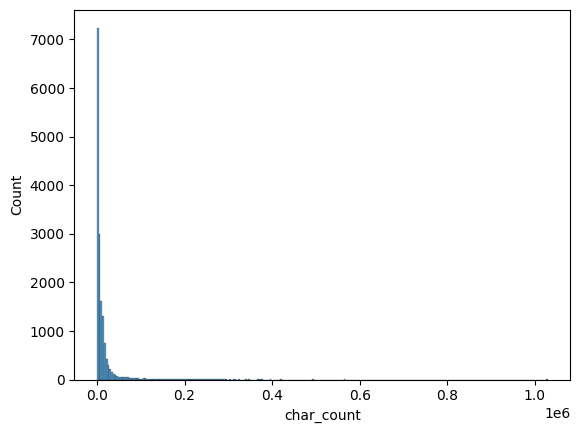

In [ ]:
sns.histplot(books['char_count'])

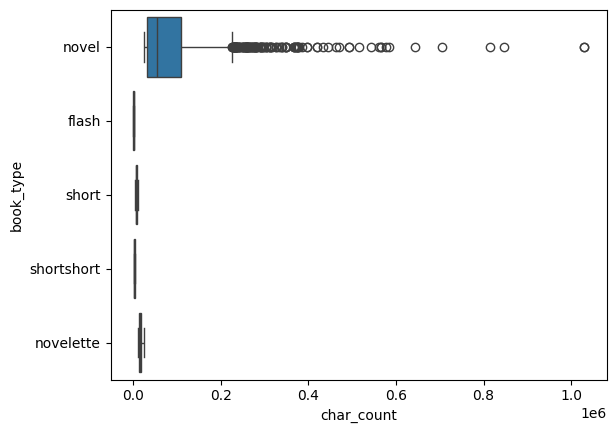

In [26]:
sns.boxplot(books, x='char_count', y='book_type');

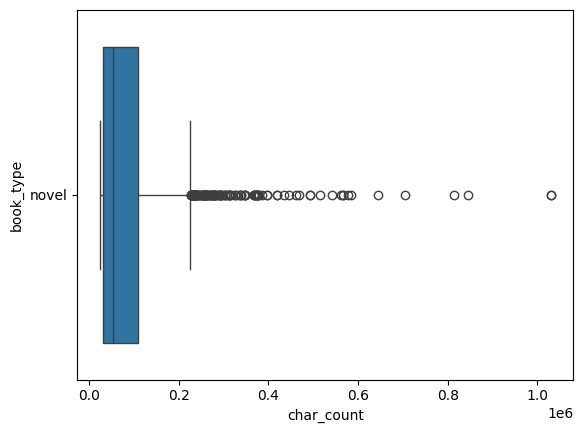

In [30]:
novels = books[books['book_type'] == 'novel']

sns.boxplot(novels, x='char_count', y ='book_type');

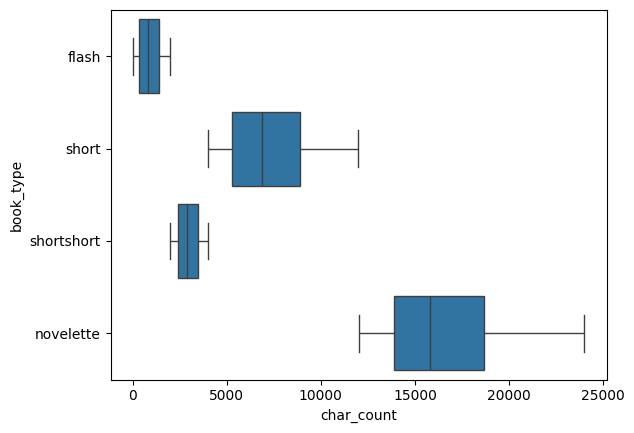

In [33]:
non_novels = books[~(books['book_type'] == 'novel')]

sns.boxplot(non_novels, x='char_count', y='book_type');

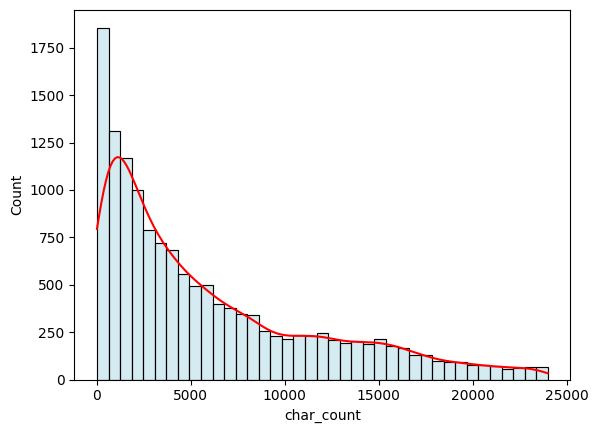

In [ ]:
ax = sns.histplot(non_novels['char_count'], kde=True, color='lightblue');
ax.lines[0].set_color('red')

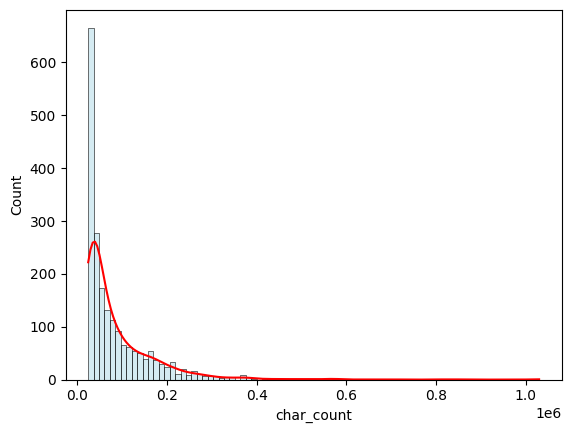

In [65]:
ax = sns.histplot(novels['char_count'], kde=True, color = 'lightblue');
ax.lines[0].set_color('red')

Character count seems to already have been categorized into bins

- `flash`: [0, 2000], centered around 850
- `shortshort`: [2001, 4000] centered around 2900
- `short`: [4001, 12000] centered around 7000
- `novelette`: [12001, 24000] centered around 16000
- `novels`: 24000+. median of 53000, mean of 86000

For models, I will be using these bins due to the variance of character count being very large.

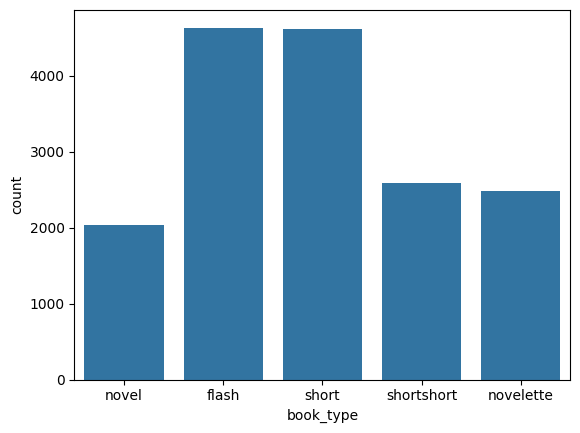

In [67]:
sns.countplot(books, x='book_type');

In [88]:
books['date_published'] = books['date_published'].astype(str)

In [106]:
idx = books[~(books['date_published'].str.contains('年'))]['date_published'].index # 年 = year

In [102]:
books.loc[59, 'date_published'] = '1972年11月3日'

In [ ]:
books.loc[idx, 'date_published'] = None

<class 'pandas.core.frame.DataFrame'>
Index: 16599 entries, 0 to 16598
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_id         16599 non-null  int64  
 1   title           16599 non-null  object 
 2   category        16596 non-null  object 
 3   char_type       16599 non-null  object 
 4   aozora_url      16599 non-null  object 
 5   author_id       16599 non-null  int64  
 6   author_role     16599 non-null  object 
 7   publisher       16127 non-null  object 
 8   date_published  16069 non-null  object 
 9   book_url        16563 non-null  object 
 10  char_count      16361 non-null  float64
 11  book_type       16353 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.2+ MB


In [ ]:
good_idx = books[~(books['date_published'].isnull())].index 

In [ ]:
books['year_pub'] = books.loc[good_idx, 'date_published'].apply(lambda x: x[0: x.index('年')])

In [127]:
books.head(5)

,book_id,title,category,char_type,aozora_url,author_id,author_role,publisher,date_published,book_url,char_count,book_type,year_pub
0,773,こころ,NDC 913,新字新仮名,https://www.aozora.gr.jp/cards/000148/card773....,148,著者,集英社文庫、集英社,1991（平成3）年2月25日,https://www.aozora.gr.jp/cards/000148/files/77...,184158.0,novel,1991（平成3）
1,45630,〔雨ニモマケズ〕,NDC 911 916,新字旧仮名,https://www.aozora.gr.jp/cards/000081/card4563...,81,著者,筑摩書房,1997（平成9）年7月30日,https://www.aozora.gr.jp/cards/000081/files/45...,395.0,flash,1997（平成9）
2,1567,走れメロス,NDC 913,新字新仮名,https://www.aozora.gr.jp/cards/000035/card1567...,35,著者,ちくま文庫、筑摩書房,1988（昭和63）年10月25日,https://www.aozora.gr.jp/cards/000035/files/15...,10344.0,short,1988（昭和63）
3,789,吾輩は猫である,NDC 913,新字新仮名,https://www.aozora.gr.jp/cards/000148/card789....,148,著者,ちくま文庫、筑摩書房,1987（昭和62）年9月29日,https://www.aozora.gr.jp/cards/000148/files/78...,368124.0,novel,1987（昭和62）
4,624,山月記,NDC 913,新字新仮名,https://www.aozora.gr.jp/cards/000119/card624....,119,著者,新潮文庫、新潮社,1969（昭和44）年9月20日、1989（平成元）年6月10日第43刷改版,https://www.aozora.gr.jp/cards/000119/files/62...,6986.0,short,1969（昭和44）


In [128]:
books['year_pub'] = books['year_pub'].str.replace(r'[^0-9]', '')

In [ ]:
books.loc[10822, 'year_pub'] = '1936 ()'

In [136]:
books['year_pub'] = books['year_pub'].astype(str)

In [148]:
np.unique_values(books['year_pub'])

array(['1820（文政3）', '1888（明治21）', '1891（明治24）', '1892（明治25）',
       '1893（明治26）', '1894（明治27）', '1895（明治28）', '1896（明治29）',
       '1897（明治30）', '1898（明治31）', '1899（明治32）', '1902（明治42）',
       '1904（明治37）', '1906（明治39）', '1907（明治40）', '1908（明治41）',
       '1909(明治42)', '1909（明治42）', '1910（明治43）', '1911（明治44）',
       '1912（明治45）', '1913（大正2）', '1914（大正3）', '1915（大正4）', '1916（大正5）',
       '1917（大正6）', '1918（大正7）', '1919（大正8）', '1920（大正9）', '1921（大正10）',
       '1922（大正11）', '1923（大正12）', '1924（大正13）', '1925（大正14）',
       '1926（大正15）', '1927（昭和2）', '1928（昭和3）', '1928（昭和4）', '1929（昭和4）',
       '1930（昭和5）', '1931（昭和6）', '1932（昭和7）', '1933（昭和8）', '1934（昭和9）',
       '1935（昭和10）', '1936 ()', '1936（大正15）', '1936（昭和11）', '1937（昭和12）',
       '1938（昭和13）', '1938（昭和43）', '1939（昭和14）', '1940（昭和15）',
       '1941（昭和16）', '1942（昭和17）', '1943（昭和18）', '1945（昭和20）',
       '1946（昭和21）', '1947（昭和22）', '1948（昭和23）', '1949（昭和24）',
       '1950（昭和25)', '1950（昭和25）', '1951（昭和26）', '1952（昭和27）',
      

In [150]:
books['year_pub'] = books.loc[good_idx, 'year_pub'].apply(lambda x: x[0: 4])

In [193]:
count = pd.DataFrame(np.unique_counts(books['year_pub'].astype(str))).T
count = count[0: 124].rename({1: 'count', 0: 'year'}, axis=1)


In [194]:
count

,year,count
0,1820.0,1
1,1888.0,1
2,1891.0,1
3,1892.0,2
4,1893.0,2
...,...,...
119,2013.0,16
120,2014.0,9
121,2015.0,8
122,2016.0,48


In [195]:
count['year'] = count['year'].astype(float)

In [196]:
count['bins'] = pd.qcut(count['year'], 9)

count

,year,count,bins
0,1820.0,1,"(1819.999, 1906.667]"
1,1888.0,1,"(1819.999, 1906.667]"
2,1891.0,1,"(1819.999, 1906.667]"
3,1892.0,2,"(1819.999, 1906.667]"
4,1893.0,2,"(1819.999, 1906.667]"
...,...,...,...
119,2013.0,16,"(2003.333, 2018.0]"
120,2014.0,9,"(2003.333, 2018.0]"
121,2015.0,8,"(2003.333, 2018.0]"
122,2016.0,48,"(2003.333, 2018.0]"


In [197]:
counts = pd.DataFrame(count.groupby('bins', as_index=False).sum()[['bins', 'count']]);

counts

C:\Users\Jaden\AppData\Local\Temp\ipykernel_2016\1040286434.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = pd.DataFrame(count.groupby('bins', as_index=False).sum()[['bins', 'count']]);


,bins,count
0,"(1819.999, 1906.667]",25
1,"(1906.667, 1920.333]",60
2,"(1920.333, 1934.0]",280
3,"(1934.0, 1948.667]",677
4,"(1948.667, 1962.333]",1066
5,"(1962.333, 1976.0]",2408
6,"(1976.0, 1989.667]",5155
7,"(1989.667, 2003.333]",5336
8,"(2003.333, 2018.0]",1062


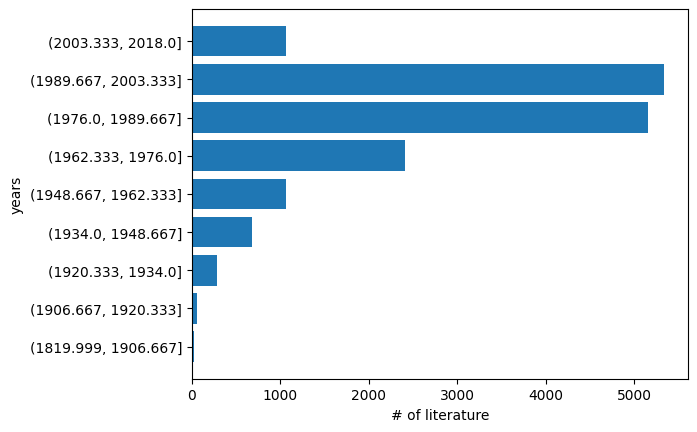

In [219]:
plt.barh(counts.bins.astype(str), counts['count']);
plt.xlabel('# of literature')
plt.ylabel('years')
plt.show()

In [200]:
counts['%_change'] = counts['count'].pct_change() * 100;

C:\Users\Jaden\AppData\Local\Temp\ipykernel_2016\2214901247.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  counts['%_change'] = counts['count'].pct_change() * 100;


#### Insights:

- The total number of works from pre-WWII to the beginning of U.S. occupation (1820 - 1948) is less than the amount written in the "post-war era" (1948 - 1962). (1042 < 1066)
- The number of works plateaus at around 5400 before the Dot-com bubble.
- The number of works in "modern" times (2003 - 2018) is scarce. This is most likely attributed to copyright issues.


In [204]:
### Categorizing by era:

era_count = count
bins = [0, 1867, 1912, 1926, 1989, 2019]
labels = ['Pre-Meiji', 'Meiji', 'Taisho', 'Showa', 'Heisei']
era_count['bins'] = pd.cut(era_count['year'], bins, labels=labels)

In [ ]:
era_count = pd.DataFrame(era_count.groupby('bins', as_index=False).sum()[['bins', 'count']]);

era_count

C:\Users\Jaden\AppData\Local\Temp\ipykernel_2016\1732380671.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  era_count = pd.DataFrame(era_count.groupby('bins', as_index=False).sum()[['bins', 'count']]);


In [207]:
era_count

,bins,count
0,Pre-Meiji,1
1,Meiji,53
2,Taisho,129
3,Showa,9488
4,Heisei,6398


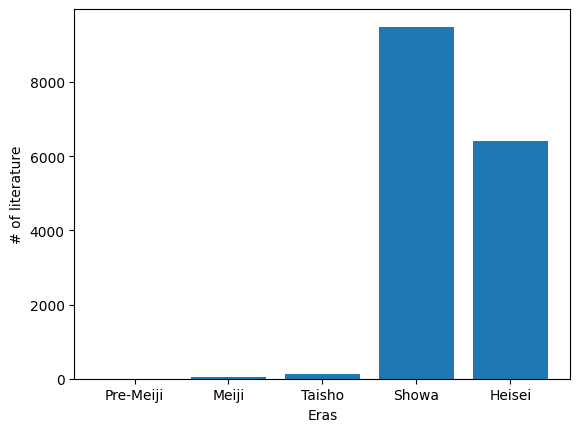

In [223]:
plt.bar(era_count.bins, era_count['count']);
plt.xlabel('Eras');
plt.ylabel('# of literature');
plt.show()

In [160]:
books['year_pub'] = books['year_pub'].astype(float)

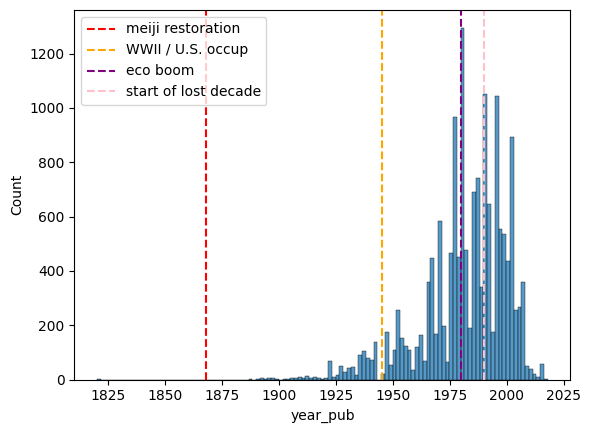

In [90]:
ax = sns.histplot(books['year_pub']);
meiji_rest = ax.axvline(x=1868, c='red', ls='--')
meiji_rest.set_label('meiji restoration')
WWII = ax.axvline(x=1945, c='orange', ls='--')
WWII.set_label('WWII / U.S. occup')
bubble = ax.axvline(x=1980, c='purple', ls='--')
bubble.set_label('eco boom')
lost = ax.axvline(x=1990, c='pink', ls='--')
lost.set_label('start of lost decade')
ax.legend(loc=2);


In [8]:
def book_count_by_year(book_type):
    df = books[books['book_type'] == book_type]
    ax = sns.histplot(df['year_pub']);
    meiji_rest = ax.axvline(x=1868, c='red', ls='--')
    meiji_rest.set_label('meiji restoration')
    WWII = ax.axvline(x=1945, c='orange', ls='--')
    WWII.set_label('WWII / U.S. occup')
    ax.legend(loc=2);

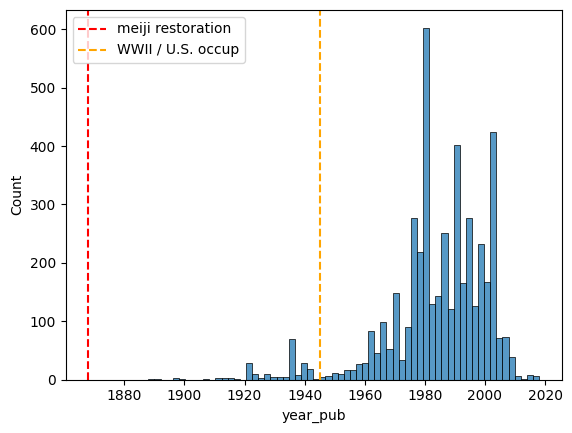

In [9]:
book_count_by_year('flash')

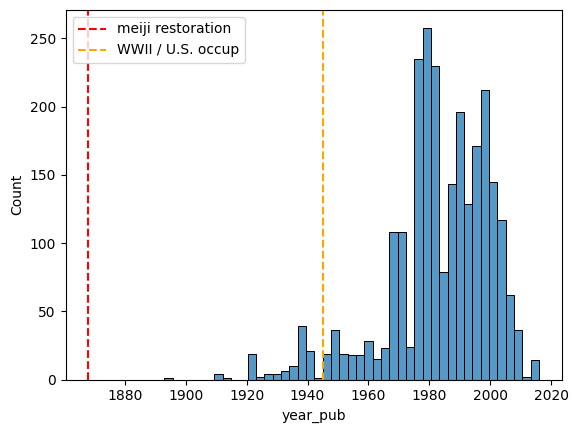

In [10]:
book_count_by_year('shortshort')

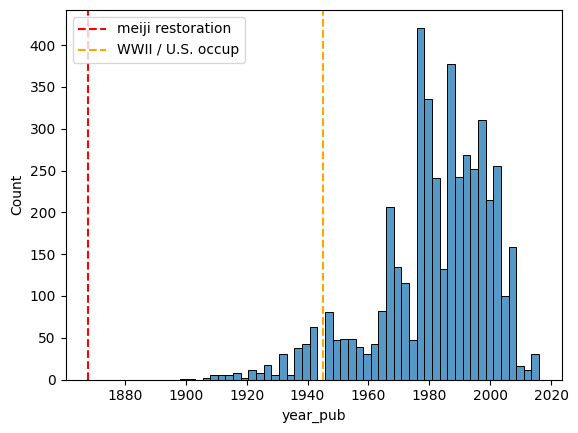

In [11]:
book_count_by_year('short')

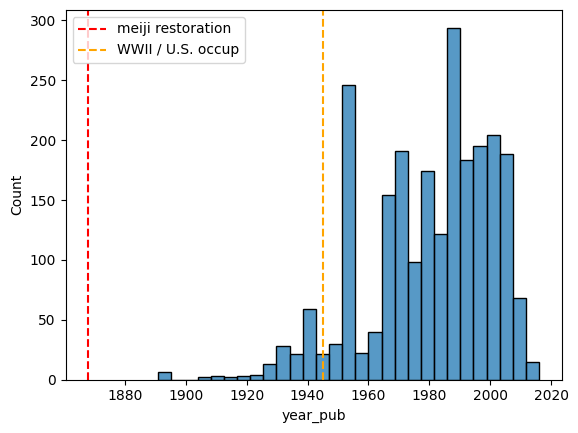

In [13]:
book_count_by_year('novelette')

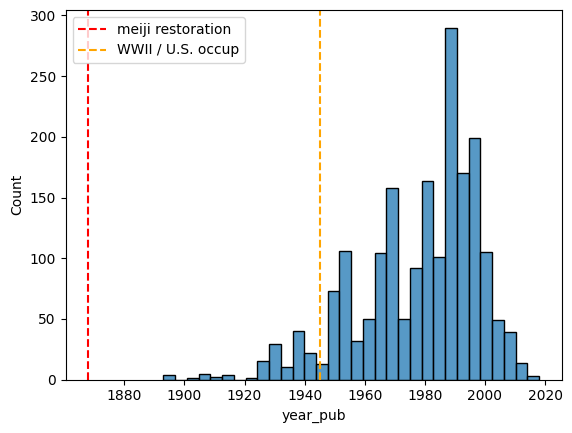

In [14]:
book_count_by_year('novel')

In [51]:
plots = []
for type in np.unique_values(books['book_type'].astype(str)):
    if type != 'nan':
        plots.append(books[books['book_type'] == type]['year_pub']) 


In [ ]:
types = np.unique_values(books['book_type'].astype(str))


AttributeError: 'numpy.ndarray' object has no attribute 'remove'

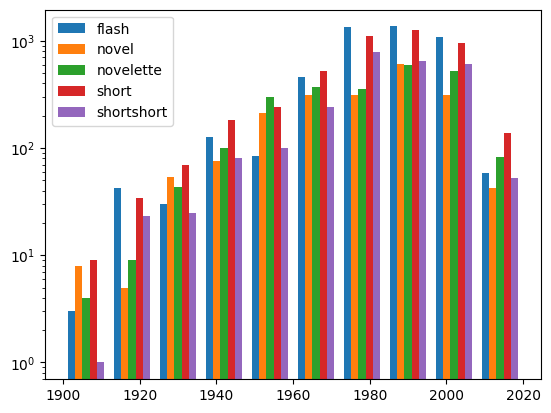

In [234]:
bins = np.linspace(1900, 2020,11)
plt.hist(plots, bins=bins, label=['flash', 'novel', 'novelette', 'short', 'shortshort'], log=True)
plt.legend(loc='upper left') 
#'flash', 'novel', 'novelette', 'short', 'shortshort'
plt.show()

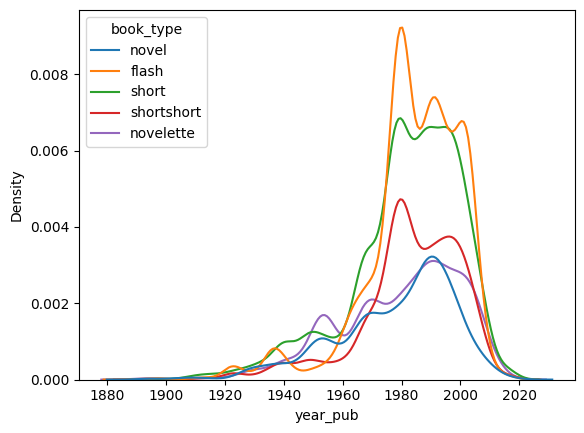

In [245]:
ax = sns.kdeplot(books, x = 'year_pub', hue='book_type');

`flash`, `short`, and `shortshort` distributions follow similar trends.
- mode is 1980
- dramatically increases starting 1960
- drop between 1980 and 1990
- respike at around 1990

`novel` and `novelette` distribitions follow similar trends.
- mode is 1990
- first spike is between 1950 and 1960
- gradual increase throughout, without many dramatic spikes.

####  Taking a peek at the authors.

In [253]:
authors.head()

,id,author,birthDate,deathDate,gender,birthPlace,last,first
0,148,夏目漱石,1867-02-09,1916-12-09,male,喜久井町,Natsume,Soseki
1,81,宮沢賢治,1896-08-27,1933-09-21,male,花巻川口町,Miyazawa,Kenji
2,35,太宰治,1909-06-19,1948-06-13,male,金木町,Dazai,Osamu
3,119,中島敦,1909-05-05,1942-12-04,male,四谷区,Nakajima,Atsushi
4,96,夢野久作,1889-01-04,1936-03-11,male,福岡市,Yumeno,Kyusaku


In [248]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1104 non-null   int64 
 1   author      1104 non-null   object
 2   birthDate   1049 non-null   object
 3   deathDate   1016 non-null   object
 4   gender      923 non-null    object
 5   birthPlace  744 non-null    object
 6   last        1104 non-null   object
 7   first       1073 non-null   object
dtypes: int64(1), object(7)
memory usage: 69.1+ KB


In [251]:
nulls(authors)

,cols,null_count,% null
0,birthPlace,360,32.609
1,gender,181,16.395
2,deathDate,88,7.971
3,birthDate,55,4.982
4,first,31,2.808
5,author,0,0.000
6,id,0,0.000
7,last,0,0.000


In [266]:
np.unique_values(authors['gender'].astype(str))

array(['female', 'male', 'unknown'], dtype=object)

In [260]:
idx = authors[authors['gender'].isnull()].index
authors.loc[idx, 'gender'] = 'unknown'

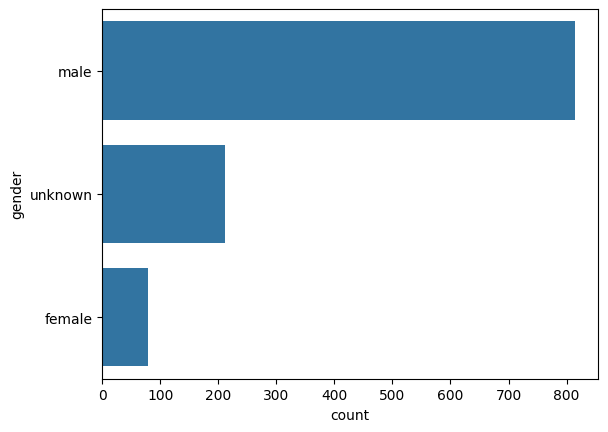

In [262]:
sns.countplot(authors['gender']);

Not many females at all...

I wonder if many of the genders labelled as `unknown` contain a lot of females. Even then, there is a disproportionate majority of males.

In [273]:
np.unique(authors['birthDate'].astype(str))

array(['-0427-00-00', '0700-01-01', '0973-00-00', '1008-00-00',
       '1048-00-00', '1153-00-00', '1265-00-00', '1341-00-00',
       '1452-04-15', '1483-11-10', '1533-02-28', '1546-00-00',
       '1596-00-00', '1608-12-09', '1628-01-12', '1640-06-05',
       '1642-00-00', '1659-00-00', '1667-11-30', '1694-00-00',
       '1695-00-00', '1711-05-07', '1743-04-13', '1748-10-13',
       '1749-05-17', '1749-08-28', '1757-11-28', '1761-09-13',
       '1765-08-02', '1766-02-13', '1769-03-29', '1769-07-18',
       '1770-02-22', '1770-12', '1771-00-00', '1772-04-19', '1772-11-14',
       '1776-01-24', '1783-00-00', '1783-04-03', '1785-01-04',
       '1786-02-24', '1796-10-24', '1797-01-10', '1797-08-30',
       '1799-05-20', '1799-05-26', '1801-00-00', '1802-02-26',
       '1803-05-25', '1804-07-04', '1805-04-02', '1807-04-20',
       '1809-01-19', '1809-03-12', '1809-08-06', '1810-12-11',
       '1811-08-30', '1812-02-07', '1812-05-07', '1813-03-15',
       '1814-08-28', '1816-04-21', '1817-07

In [281]:
def get_year(row):
    if pd.isnull(row):
        return None
    
    return row[0: row.index('-', 1)] # starting at 1 as there are a few BC years that are represented as -[year]

authors['birthYear'] = authors['birthDate'].apply(get_year)

In [284]:
np.unique_values(authors['birthYear'].astype(str))

array(['-0427', '0700', '0973', '1008', '1048', '1153', '1265', '1341',
       '1452', '1483', '1533', '1546', '1596', '1608', '1628', '1640',
       '1642', '1659', '1667', '1694', '1695', '1711', '1743', '1748',
       '1749', '1757', '1761', '1765', '1766', '1769', '1770', '1771',
       '1772', '1776', '1783', '1785', '1786', '1796', '1797', '1799',
       '1801', '1802', '1803', '1804', '1805', '1807', '1809', '1810',
       '1811', '1812', '1813', '1814', '1816', '1817', '1818', '1820',
       '1821', '1823', '1824', '1828', '1829', '1830', '1831', '1832',
       '1833', '1834', '1835', '1836', '1837', '1838', '1839', '1840',
       '1841', '1842', '1843', '1844', '1846', '1847', '1848', '1849',
       '1850', '1851', '1852', '1853', '1854', '1855', '1856', '1857',
       '1858', '1859', '1860', '1861', '1862', '1863', '1864', '1865',
       '1866', '1867', '1868', '1869', '1870', '1871', '1872', '1873',
       '1874', '1875', '1876', '1877', '1878', '1879', '1880', '1881',
     

In [ ]:
authors.loc[1009, ['birthDate', 'birthYear']] = ['1928-00-00', '1928']

In [309]:
def get_author_age_at_publish(row):
    if np.any(pd.isnull(row)) is True:
        return None
    
    print(row)
    
    author_birth = int(authors[authors['id'] == row['author_id']]['birthYear'])
    print(author_birth)
    year_pub = int(row['year_pub'])

    age_at_publish = year_pub - author_birth
    print(year_pub)
    print(f'age: {age_at_publish}')


In [310]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16599 entries, 0 to 16598
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_id         16599 non-null  int64  
 1   title           16599 non-null  object 
 2   category        16596 non-null  object 
 3   char_type       16599 non-null  object 
 4   aozora_url      16599 non-null  object 
 5   author_id       16599 non-null  int64  
 6   author_role     16599 non-null  object 
 7   publisher       16127 non-null  object 
 8   date_published  16069 non-null  object 
 9   book_url        16563 non-null  object 
 10  char_count      16361 non-null  float64
 11  book_type       16353 non-null  object 
 12  year_pub        16069 non-null  float64
dtypes: float64(2), int64(2), object(9)
memory usage: 2.3+ MB


In [311]:
books[['year_pub', 'author_id']].apply(get_author_age_at_publish, axis=1)

year_pub     1991.0
author_id     148.0
Name: 0, dtype: float64
1867
1991
age: 124
year_pub     1997.0
author_id      81.0
Name: 1, dtype: float64
1896
1997
age: 101
year_pub     1988.0
author_id      35.0
Name: 2, dtype: float64
1909
1988
age: 79
year_pub     1987.0
author_id     148.0
Name: 3, dtype: float64
1867
1987
age: 120
year_pub     1969.0
author_id     119.0
Name: 4, dtype: float64
1909
1969
age: 60
year_pub     1952.0
author_id      35.0
Name: 5, dtype: float64
1909
1952
age: 43
year_pub     1992.0
author_id      96.0
Name: 6, dtype: float64
1889
1992
age: 103
year_pub     1986.0
author_id     879.0
Name: 7, dtype: float64
1892
1986
age: 94
year_pub     1992.0
author_id     148.0
Name: 8, dtype: float64
1867
1992
age: 125
year_pub     1989.0
author_id      81.0
Name: 9, dtype: float64
1896
1989
age: 93
year_pub     1986.0
author_id     879.0
Name: 10, dtype: float64
1892
1986
age: 94
year_pub     1988.0
author_id     148.0
Name: 11, dtype: float64
1867
1988
age: 121
year_pub

C:\Users\Jaden\AppData\Local\Temp\ipykernel_2016\2708576862.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  author_birth = int(authors[authors['id'] == row['author_id']]['birthYear'])


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

#### Clusters